In [6]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
#import os
import seaborn as sns
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:
data= pd.read_excel('Sales_project.xlsx')
sales_order= pd.read_excel('Sales_project.xlsx','Sales Orders Sheet')
customers=pd.read_excel('Sales_project.xlsx', 'Customers Sheet')
site_location= pd.read_excel('Sales_project.xlsx','Site Location sheet')
products= pd.read_excel('Sales_project.xlsx', 'Products_Sheet')
sales_team= pd.read_excel('Sales_project.xlsx','Sales Team Sheet')

In [9]:
sales_order.head(5)

,OrderNumber,OrderDate,CurrencyCode,_SalesAM_ID,_CustomerID,_SiteID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000175,2018-06-09,RWF,1,1,107,1,1,0.075,2224.4,1579.324
1,SO - 0003171,2019-05-26,RWF,8,1,288,1,1,0.300,3966.4,2816.144
2,SO - 0003587,2019-07-16,RWF,11,1,129,1,2,0.100,3852.5,2658.225
3,SO - 0005097,2020-01-14,RWF,22,1,4,1,1,0.075,2505.8,1954.524
4,SO - 0005532,2020-03-04,RWF,11,1,48,1,1,0.100,3256.2,2767.770


# Data Augementation

In [10]:
#Drop the Currrency Column since it's universal
sales_order.drop(['CurrencyCode'], axis=1, inplace=True)

In [11]:
#Calculate total amount of each transaction with discount deduction
sales_order['Total Amount'] = (sales_order['Order Quantity']* sales_order['Unit Price'])-sales_order['Discount Applied']

In [12]:
#Create Month/Year column from datetime column
sales_order['Month'] = pd.DatetimeIndex(sales_order['OrderDate']).month
sales_order['Year'] = pd.DatetimeIndex(sales_order['OrderDate']).year

In [24]:
sales_order.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7991 entries, 0 to 7990
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   OrderDate         7991 non-null   datetime64[ns]
 2   _SalesAM_ID       7991 non-null   int64         
 3   _CustomerID       7991 non-null   int64         
 4   _SiteID           7991 non-null   int64         
 5   _ProductID        7991 non-null   int64         
 6   Order Quantity    7991 non-null   int64         
 7   Discount Applied  7991 non-null   float64       
 8   Unit Price        7991 non-null   float64       
 9   Unit Cost         7991 non-null   float64       
 10  Total Amount      7991 non-null   float64       
 11  Month             7991 non-null   int64         
 12  Year              7991 non-null   int64         
 13  Profit            7991 non-null   float64       
 14  Bandwidth         7991 n

In [25]:
sales_order.head()

,OrderNumber,OrderDate,_SalesAM_ID,_CustomerID,_SiteID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Amount,Month,Year,Profit,Bandwidth
0,SO - 000175,2018-06-09,1,1,107,1,1,0.075,2224.4,1579.324,2224.325,6,2018,645.001,0
1,SO - 0003171,2019-05-26,8,1,288,1,1,0.300,3966.4,2816.144,3966.100,5,2019,1149.956,0
2,SO - 0003587,2019-07-16,11,1,129,1,2,0.100,3852.5,2658.225,7704.900,7,2019,1194.175,0
3,SO - 0005097,2020-01-14,22,1,4,1,1,0.075,2505.8,1954.524,2505.725,1,2020,551.201,0
4,SO - 0005532,2020-03-04,11,1,48,1,1,0.100,3256.2,2767.770,3256.100,3,2020,488.330,0


In [13]:
#Calculate profit from each individual sale transaction
sales_order['Profit'] = (sales_order['Unit Price']- sales_order['Unit Cost'])-sales_order['Discount Applied']

In [14]:
#Add Bandwidth purchased from each transaction
sales_order = sales_order.merge(products[['_ProductID','Bandwidth']], left_on = "_ProductID", right_on = "_ProductID", how = "left")

In [15]:
#Add last purchase data in days from
def last_purchase(customer_id, OrderIndex):
    customer_purchase = sales_order.query("_CustomerID == {customer_id}").sort_values(['OrderDate'])
    current_purchase_date = customer_purchase.loc[OrderIndex].OrderDate #current purchase data
    last_purchase_date = customer_purchase.loc[OrderIndex -1]


In [16]:
#Group all prouduct demand by their months

In [17]:
demand = pd.DataFrame()
for item in sales_order['_ProductID'].unique():
    demand[str(item)] = 0

In [18]:
demand.head()

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47


In [19]:
#Uniques months
len(sales_order['_ProductID'].unique())

47

In [27]:
sales_order['Month-Year']= sales_order['OrderDate'].dt.strftime('%Y/%m')

In [28]:
sales_order.loc[(sales_order['Month-Year'] == '2018/05') & (sales_order['_ProductID'] == 1)].OrderNumber.count()

1

In [29]:
prod_demand = {}

In [30]:
for product in list(sales_order['_ProductID'].unique()):
    month_demand = []
    for mo in list(sales_order['Month-Year'].unique()):
        b = sales_order.loc[(sales_order['Month-Year'] == mo) & (sales_order['_ProductID'] == product)].OrderNumber.count() 
        month_demand.append(b)
    prod_demand[product] = month_demand

In [31]:
prod_demand['Month-Year'] = sales_order['Month-Year'].unique()

In [32]:
bv = pd.DataFrame(prod_demand)

<AxesSubplot:xlabel='Month-Year'>

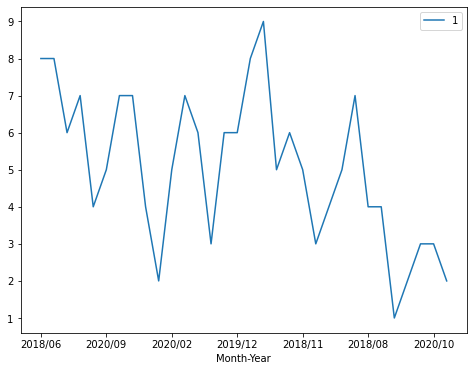

In [33]:
bv.plot.line(x='Month-Year',y=[1], figsize=(8,6))

In [34]:
for product in list(sales_order['_ProductID'].unique()):
    month_demand = []
    for mo in list(sales_order['_SiteID'].unique()):
        b = sales_order.loc[(sales_order['_SiteID'] == mo) & (sales_order['_ProductID'] == product)].OrderNumber.count() 
        month_demand.append(b)
    prod_demand[product] = month_demand

In [35]:
for row in range(len(demand)):
    print(demand.iloc[row].name)

In [36]:
prod_demand = sales_order.groupby('Month-Year').agg(qty = ('_ProductID', 'sum')).astype({'qty':int})

In [37]:
prod_demand

,qty
Month-Year,
2018/05,156
2018/06,6018
2018/07,5858
2018/08,6330
2018/09,6223
2018/10,5577
2018/11,6098
2018/12,7240
2019/01,7135


In [38]:
sales_order.query

<bound method DataFrame.query of        OrderNumber  OrderDate  _SalesAM_ID  _CustomerID  _SiteID  _ProductID  \
0      SO - 000175 2018-06-09            1            1      107           1   
1     SO - 0003171 2019-05-26            8            1      288           1   
2     SO - 0003587 2019-07-16           11            1      129           1   
3     SO - 0005097 2020-01-14           22            1        4           1   
4     SO - 0005532 2020-03-04           11            1       48           1   
...            ...        ...          ...          ...      ...         ...   
7986  SO - 0007448 2020-10-16           18           48      207          47   
7987  SO - 0002912 2019-04-27            2           49      230          47   
7988  SO - 0003106 2019-05-19           13           49      238          47   
7989  SO - 0005880 2020-04-15           11           50       33          47   
7990  SO - 0007879 2020-12-05           24           50      111          47   

      

In [39]:
demand = pd.DataFrame()
for product in list(sales_order['_ProductID'].unique()):
    demand[str(product)] = 0

In [40]:
#customer_purchase = sales_order.query("_CustomerID == 1").sort_values(['OrderDate'])
#current_purchase_date = customer_purchase.loc[0].OrderDate
#last_purchase_date = customer_purchase.iloc[0 -1]

In [41]:
#current_purchase_date

In [42]:
#sales_order.query("_CustomerID == 1").sort_values(['OrderDate'])

In [43]:
#sales_order['Month-Year']= sales_order['OrderDate'].dt.strftime('%Y/%m')

In [44]:
#sales_order['_ProductID'].groupby([sales_order.Year]).agg('count')
#sales_order['_ProductID'].groupby([sales_order["Month-Year"]]).agg('count')

In [45]:
#sales_order.head()

# Cleaning data

In [46]:
sales_order.isnull().sum()

OrderNumber         0
OrderDate           0
_SalesAM_ID         0
_CustomerID         0
_SiteID             0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
Total Amount        0
Month               0
Year                0
Profit              0
Bandwidth           0
Month-Year          0
dtype: int64

# Building the model

## Predicting future products demand

In [47]:
x = sales_order.drop(["_ProductID","OrderNumber","OrderDate","Year","Month-Year"], axis="columns")
y = sales_order["_ProductID"]

In [48]:
sales_order.head()

,OrderNumber,OrderDate,_SalesAM_ID,_CustomerID,_SiteID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Amount,Month,Year,Profit,Bandwidth,Month-Year
0,SO - 000175,2018-06-09,1,1,107,1,1,0.075,2224.4,1579.324,2224.325,6,2018,645.001,0,2018/06
1,SO - 0003171,2019-05-26,8,1,288,1,1,0.300,3966.4,2816.144,3966.100,5,2019,1149.956,0,2019/05
2,SO - 0003587,2019-07-16,11,1,129,1,2,0.100,3852.5,2658.225,7704.900,7,2019,1194.175,0,2019/07
3,SO - 0005097,2020-01-14,22,1,4,1,1,0.075,2505.8,1954.524,2505.725,1,2020,551.201,0,2020/01
4,SO - 0005532,2020-03-04,11,1,48,1,1,0.100,3256.2,2767.770,3256.100,3,2020,488.330,0,2020/03


In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_train.dtypes

_SalesAM_ID           int64
_CustomerID           int64
_SiteID               int64
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
Total Amount        float64
Month                 int64
Profit              float64
Bandwidth             int64
dtype: object

In [50]:
# X_train = X_train.values.reshape(-1, 1)
# y_train = y_train.values.reshape(-1, 1)
# X_test = X_test.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

In [69]:
# using Decision tree algorithm 

In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [52]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred=model.predict(X_test)
y_predtrain = model1.predict(X_train)


In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

1.608938290623446

In [55]:
# prediction on the testing 
100-mean_absolute_percentage_error(y_test,y_pred)

98.39106170937656

In [85]:
# prediction on the training 
100-mean_absolute_percentage_error(y_train,y_predtrain)

98.52344884758489

In [57]:
#b[8][0][0]

# using support vector machine

In [58]:
 # Feature Scaling
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


# Fitting data into simple linear regression¶

In [79]:
from sklearn.linear_model import LinearRegression
# model
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("intercept", model1.intercept_)
print("coefficients", model1.coef_)

# predicting
y_pred1 = model1.predict(X_test)
y_predtrain1 = model1.predict(X_train)



intercept 23.745202736525947
coefficients [-0.06784344  0.2751349   0.10398587  0.37963506  0.00982091  0.13472794
  0.40220666 -0.51145852  0.34110752 -0.30326487  3.48092921]


In [82]:
# evaluation of model
print("evaluation on tests",100-mean_absolute_percentage_error(y_test,y_pred1))
print("evaluation on train",100-mean_absolute_percentage_error(y_train,y_predtrain1))

evaluation on tests 98.41965011127311
evaluation on train 98.52344884758489


In [86]:
# measuring error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred1)

1.5803498887268803

# polynomial regression

In [83]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
xtrainpoly = poly.fit_transform(X_train)
xtestpoly = poly.fit_transform(X_test)

model2 = LinearRegression()
model2.fit(xtrainpoly, y_train)

# predicting
y_pred2 = model2.predict(xtestpoly)
y_predtrain2 = model2.predict(xtrainpoly)

# evaluation of model
print("evaluation on test",100-mean_absolute_percentage_error(y_test,y_pred2))
print("evaluation on train",100-mean_absolute_percentage_error(y_train,y_predtrain2))

evaluation on test 98.45879136699567
evaluation on train 98.57317762558354


In [87]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred2)

1.5412086330043313

# The hightest performing model from the results is polynomial regression, it is the one we are going to save

In [90]:
#Saving the model

In [91]:
#PICKLE FORMAT

In [110]:
import pickle

In [111]:
#with open('models_pickle','wb') as f:
    #pickle.dump(model,f)

In [112]:
pickle.dump(model2, open('models/bsc_sales_model.pkl','wb'))

# saving in sav joblib format


In [113]:
import joblib

In [116]:
joblib.dump(model2, open('models/bsc_sales_model.sav','wb'))
